In [11]:
import numpy as np
import matplotlib.pyplot as plt; plt.rc('font', size=16)
import matplotlib.cm as cm
import pandas as pd
import random

cols = [cm.tab10(i) for i in range(10)]
cols.append(cm.Set2(5))
cols.append(cm.Paired(4))

In [12]:
coproseq = pd.read_excel('COPROseq.xlsx', index_col=0)
coproseq['CV'] = coproseq['s.d.'] / coproseq['Mean']
coproseq

,Group,Day,Mean,s.d.,CV
Species,,,,,
B. caccae,LF/HPP => HF/HS => LF/HPP,1,11.372480,4.757109,0.418300
B. caccae,LF/HPP => HF/HS => LF/HPP,2,15.036671,3.793012,0.252251
B. caccae,LF/HPP => HF/HS => LF/HPP,3,13.114301,3.787854,0.288834
B. caccae,LF/HPP => HF/HS => LF/HPP,5,9.303323,2.729743,0.293416
B. caccae,LF/HPP => HF/HS => LF/HPP,7,8.485106,0.556054,0.065533
...,...,...,...,...,...
R. obeum,HF/HS => LF/HPP => HF/HS,35,0.847008,0.401241,0.473715
R. obeum,HF/HS => LF/HPP => HF/HS,38,0.977953,0.535182,0.547247
R. obeum,HF/HS => LF/HPP => HF/HS,40,1.099269,0.626488,0.569913


In [13]:
LF = coproseq[coproseq['Group'] == 'LF/HPP => HF/HS => LF/HPP'].copy()
LF['Mean cum'] = LF.groupby(['Day'])['Mean'].cumsum()
HF = coproseq[coproseq['Group'] == 'HF/HS => LF/HPP => HF/HS'].copy()
HF['Mean cum'] = HF.groupby(['Day'])['Mean'].cumsum()

In [43]:
cols[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

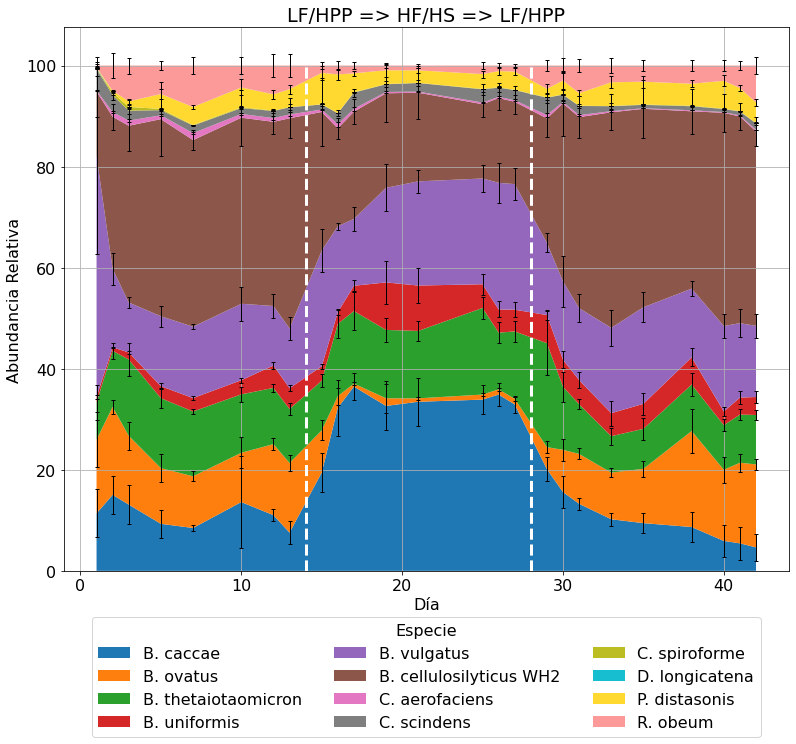

In [14]:
x_LF = LF.Day.unique()
y_LF = {}
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].Mean.values
plt.figure(figsize=(13, 10))
plt.stackplot(x_LF, y_LF.values(), labels=y_LF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(LF['Day'], LF['Mean cum'], yerr=LF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()
# plt.savefig('LF.png', bbox_inches='tight')
plt.show()

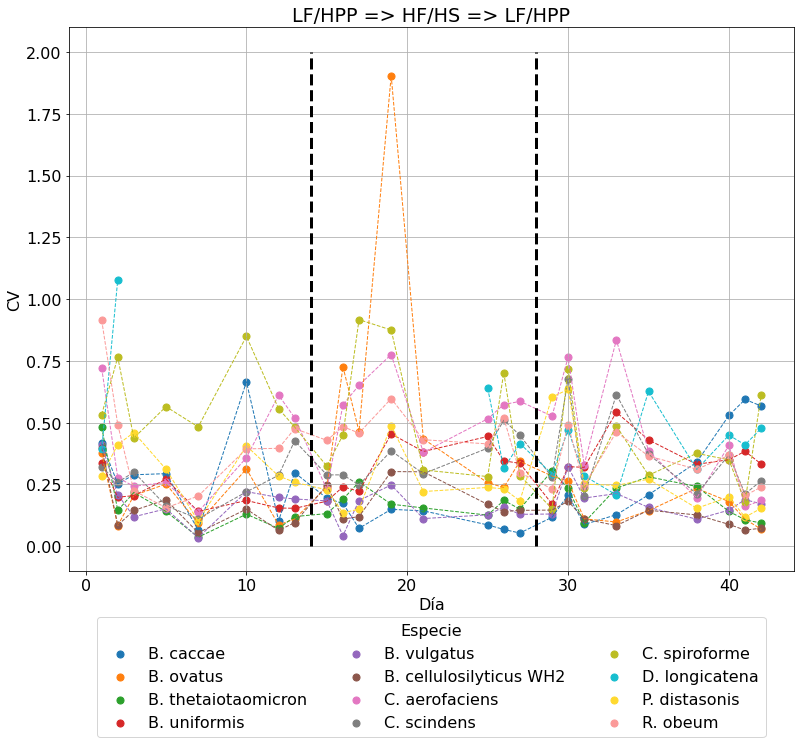

In [51]:
plt.figure(figsize=(13, 10))
x_LF = LF.Day.unique()
y_LF = {}
col = 0
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].CV.values
    plt.scatter(x_LF, y_LF[i], label=i, s=50, color=cols[col])
    plt.plot(x_LF, y_LF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('CV')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()
# plt.savefig('LF_CV.png', bbox_inches='tight')
plt.show()

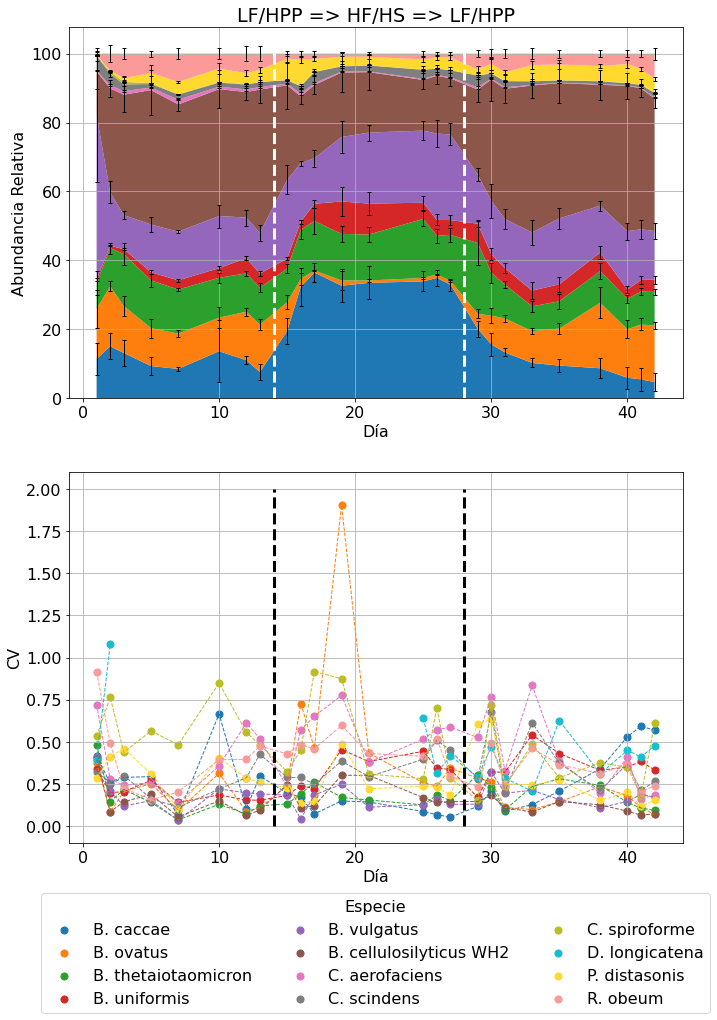

In [64]:
plt.figure(figsize=(11, 15))
plt.subplot(2, 1, 1)
x_LF = LF.Day.unique()
y_LF = {}
col = 0
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].Mean.values
plt.stackplot(x_LF, y_LF.values(), labels=y_LF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(LF['Day'], LF['Mean cum'], yerr=LF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()
plt.subplot(2, 1, 2)
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].CV.values
    plt.scatter(x_LF, y_LF[i], label=i, s=50, color=cols[col])
    plt.plot(x_LF, y_LF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.48),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('CV')
plt.grid()
plt.show()

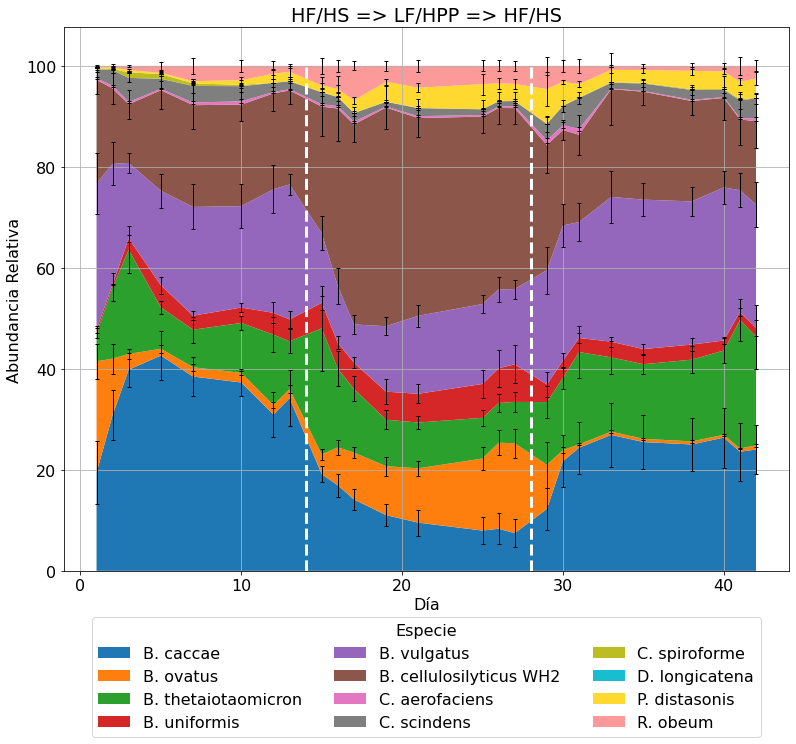

In [4]:
x_HF = HF.Day.unique()
y_HF = {}
for i in HF.index.unique():
    y_HF[i] = HF[HF.index == i].Mean.values
plt.figure(figsize=(13, 10))
plt.stackplot(x_HF, y_HF.values(), labels=y_HF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(HF['Day'], HF['Mean cum'], yerr=HF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('HF/HS => LF/HPP => HF/HS')
plt.grid()
# plt.savefig('HF.png', bbox_inches='tight')
plt.show()

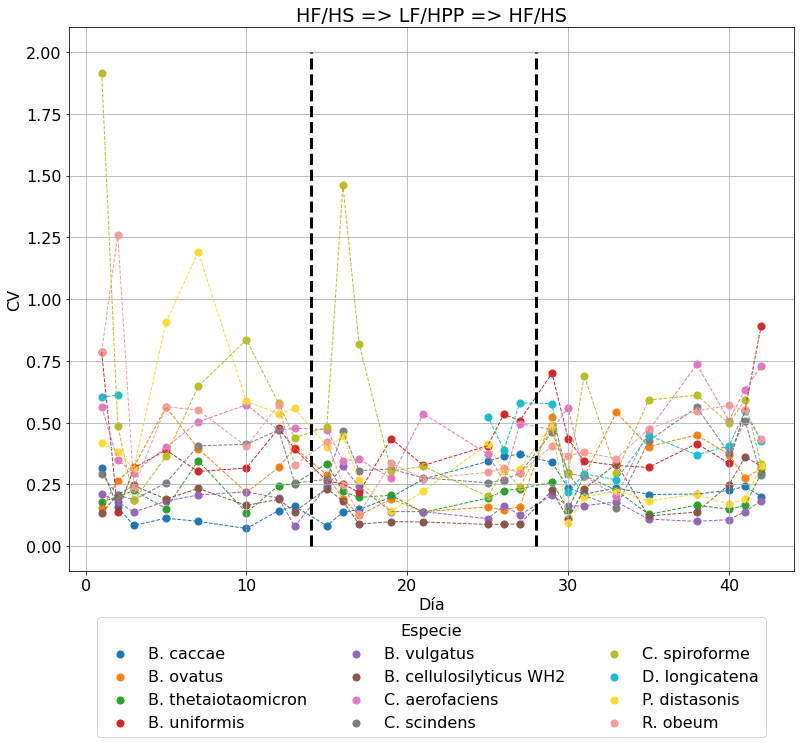

In [65]:
plt.figure(figsize=(13, 10))
x_HF = HF.Day.unique()
y_HF = {}
col = 0
for i in HF.index.unique():
    y_HF[i] = HF[HF.index == i].CV.values
    plt.scatter(x_HF, y_HF[i], label=i, s=50, color=cols[col])
    plt.plot(x_HF, y_HF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.32),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('CV')
plt.title('HF/HS => LF/HPP => HF/HS')
plt.grid()
# plt.savefig('HF_CV.png', bbox_inches='tight')
plt.show()

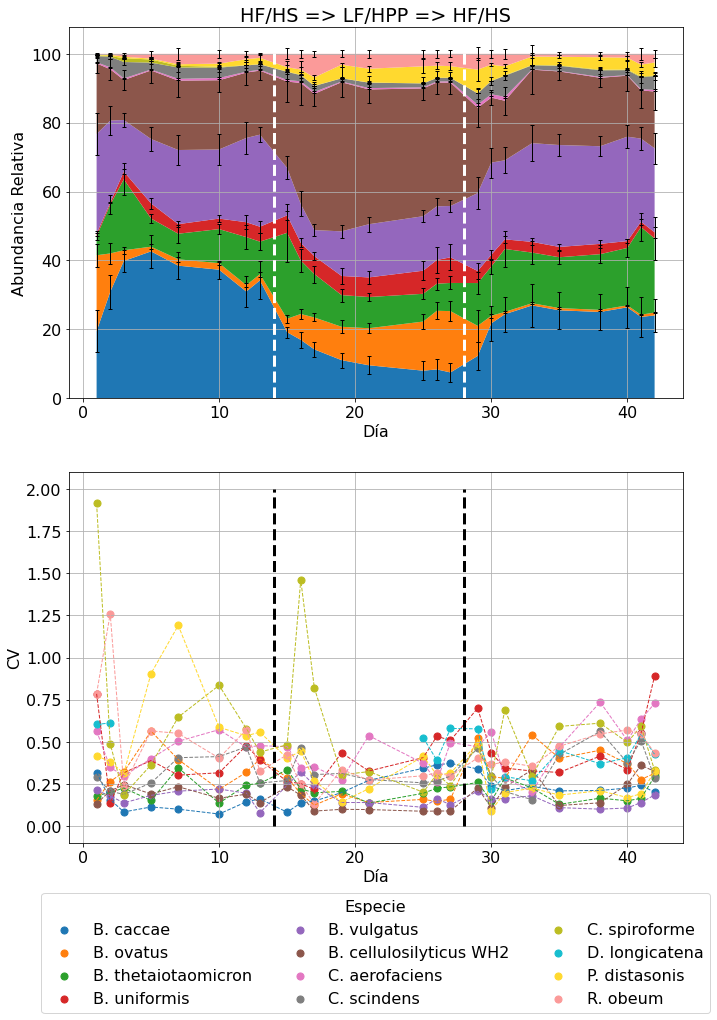

In [82]:
plt.figure(figsize=(11, 15))
plt.subplot(2, 1, 1)
x_HF = HF.Day.unique()
y_HF = {}
col = 0
for i in HF.index.unique():
    y_HF[i] = HF[LF.index == i].Mean.values
plt.stackplot(x_HF, y_HF.values(), labels=y_HF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(HF['Day'], HF['Mean cum'], yerr=HF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('HF/HS => LF/HPP => HF/HS')
plt.grid()
plt.subplot(2, 1, 2)
for i in HF.index.unique():
    y_HF[i] = HF[HF.index == i].CV.values
    plt.scatter(x_HF, y_HF[i], label=i, s=50, color=cols[col])
    plt.plot(x_HF, y_HF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.48),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('CV')
plt.grid()
plt.show()

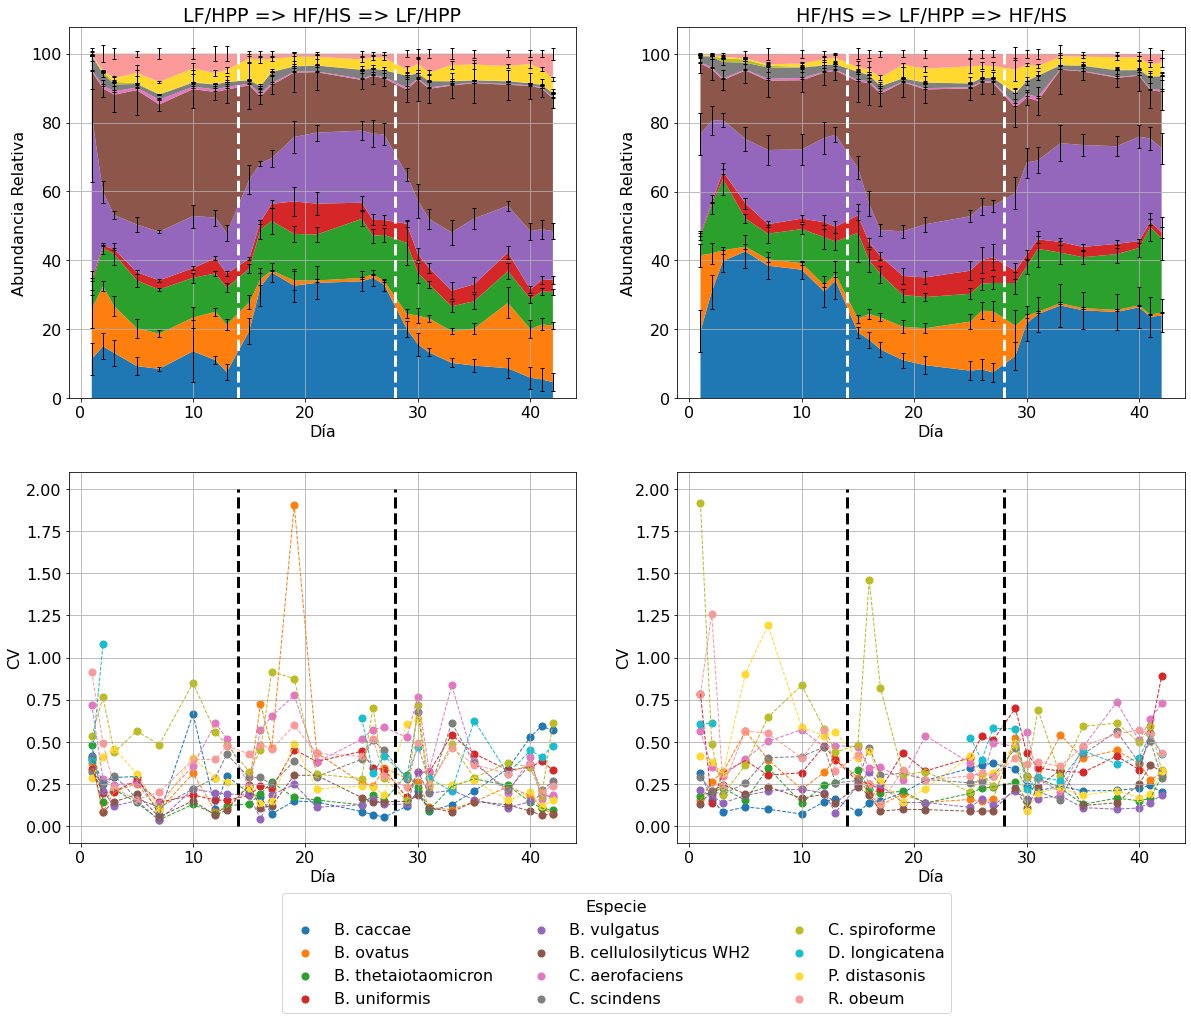

In [83]:
plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
x_LF = LF.Day.unique()
y_LF = {}
col = 0
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].Mean.values
plt.stackplot(x_LF, y_LF.values(), labels=y_LF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(LF['Day'], LF['Mean cum'], yerr=LF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('LF/HPP => HF/HS => LF/HPP')
plt.grid()
plt.subplot(2, 2, 3)
for i in LF.index.unique():
    y_LF[i] = LF[LF.index == i].CV.values
    plt.scatter(x_LF, y_LF[i], label=i, s=50, color=cols[col])
    plt.plot(x_LF, y_LF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.xlabel('Día')
plt.ylabel('CV')
plt.grid()
plt.subplot(2, 2, 2)
x_HF = HF.Day.unique()
y_HF = {}
col = 0
for i in HF.index.unique():
    y_HF[i] = HF[LF.index == i].Mean.values
plt.stackplot(x_HF, y_HF.values(), labels=y_HF.keys(), colors=cols)
plt.vlines(x=14, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=102, color='w', linestyle='--', linewidth=3)
plt.errorbar(HF['Day'], HF['Mean cum'], yerr=HF['s.d.'], color='k', linestyle='None', elinewidth=1, capsize=2)
plt.xlabel('Día')
plt.ylabel('Abundancia Relativa')
plt.title('HF/HS => LF/HPP => HF/HS')
plt.grid()
plt.subplot(2, 2, 4)
for i in HF.index.unique():
    y_HF[i] = HF[HF.index == i].CV.values
    plt.scatter(x_HF, y_HF[i], label=i, s=50, color=cols[col])
    plt.plot(x_HF, y_HF[i], linewidth=1, linestyle='--', color=cols[col])
    col += 1
plt.vlines(x=14, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.vlines(x=28, ymin=0, ymax=2, color='k', linestyle='--', linewidth=3)
plt.legend(loc='lower center', bbox_to_anchor=(-0.12, -0.48),
          ncol=3, fancybox=True, shadow=False, title='Especie')
plt.xlabel('Día')
plt.ylabel('CV')
plt.grid()
# plt.savefig('CV.png', bbox_inches='tight')
plt.show()